In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
transactions = pd.read_csv('Downloads/assesment/Transactions.csv')
products = pd.read_csv('Downloads/assesment/Products.csv')
customers = pd.read_csv('Downloads/assesment/Customers.csv')


In [67]:
print(transactions.head())
print(products.head())
print(customers.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawre

In [4]:
print(transactions.tail())
print(products.tail())
print(customers.tail())

    TransactionID CustomerID ProductID      TransactionDate  Quantity  \
995        T00496      C0118      P037  2024-10-24 08:30:27         1   
996        T00759      C0059      P037  2024-06-04 02:15:24         3   
997        T00922      C0018      P037  2024-04-05 13:05:32         4   
998        T00959      C0115      P037  2024-09-29 10:16:02         2   
999        T00992      C0024      P037  2024-04-21 10:52:24         1   

     TotalValue   Price  
995      459.86  459.86  
996     1379.58  459.86  
997     1839.44  459.86  
998      919.72  459.86  
999      459.86  459.86  
   ProductID             ProductName     Category   Price
95      P096    SoundWave Headphones  Electronics  307.47
96      P097      BookWorld Cookbook        Books  319.34
97      P098        SoundWave Laptop  Electronics  299.93
98      P099  SoundWave Mystery Book        Books  354.29
99      P100       HomeSense Sweater     Clothing  126.34
    CustomerID      CustomerName  Region  SignupDate
195 

In [5]:
transactions.info()
products.info()
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pan

In [6]:
transactions.isnull().sum()
products.isnull().sum()
customers.isnull().sum()


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [7]:
df = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')
print(df)

    TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0          T00001      C0199      P067  2024-08-25 12:38:23         1   
1          T00112      C0146      P067  2024-05-27 22:23:54         1   
2          T00166      C0127      P067  2024-04-25 07:38:55         1   
3          T00272      C0087      P067  2024-03-26 22:55:37         2   
4          T00363      C0070      P067  2024-03-21 15:10:10         3   
..            ...        ...       ...                  ...       ...   
995        T00496      C0118      P037  2024-10-24 08:30:27         1   
996        T00759      C0059      P037  2024-06-04 02:15:24         3   
997        T00922      C0018      P037  2024-04-05 13:05:32         4   
998        T00959      C0115      P037  2024-09-29 10:16:02         2   
999        T00992      C0024      P037  2024-04-21 10:52:24         1   

     TotalValue  Price_x                      ProductName     Category  \
0        300.68   300.68  ComfortLiving Bluetooth

In [8]:
df.duplicated().sum()

0

In [10]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['SignupDate'] = pd.to_datetime(df['SignupDate'])

In [11]:
print(df['CustomerID'].nunique())


199


In [13]:
print(df)

    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0          T00001      C0199      P067 2024-08-25 12:38:23         1   
1          T00112      C0146      P067 2024-05-27 22:23:54         1   
2          T00166      C0127      P067 2024-04-25 07:38:55         1   
3          T00272      C0087      P067 2024-03-26 22:55:37         2   
4          T00363      C0070      P067 2024-03-21 15:10:10         3   
..            ...        ...       ...                 ...       ...   
995        T00496      C0118      P037 2024-10-24 08:30:27         1   
996        T00759      C0059      P037 2024-06-04 02:15:24         3   
997        T00922      C0018      P037 2024-04-05 13:05:32         4   
998        T00959      C0115      P037 2024-09-29 10:16:02         2   
999        T00992      C0024      P037 2024-04-21 10:52:24         1   

     TotalValue  Price_x                      ProductName     Category  \
0        300.68   300.68  ComfortLiving Bluetooth Speaker  El

In [14]:
print("\n--- Customer Distribution by Region ---")
customer_region_count = df['Region'].value_counts()
print(customer_region_count)


--- Customer Distribution by Region ---
Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64


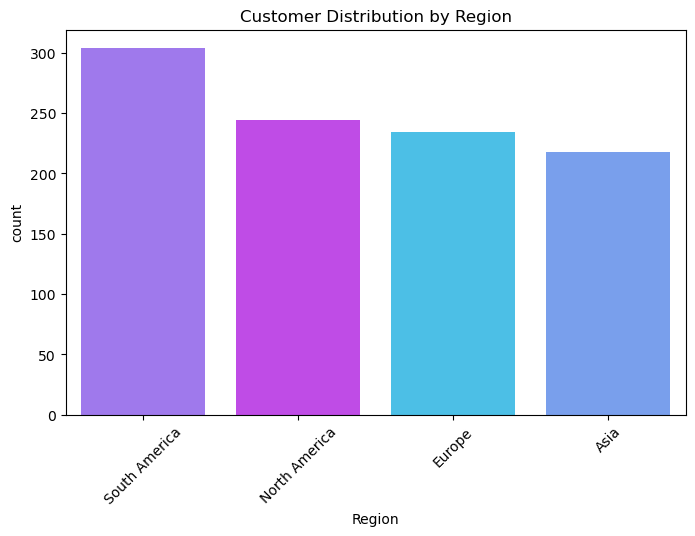

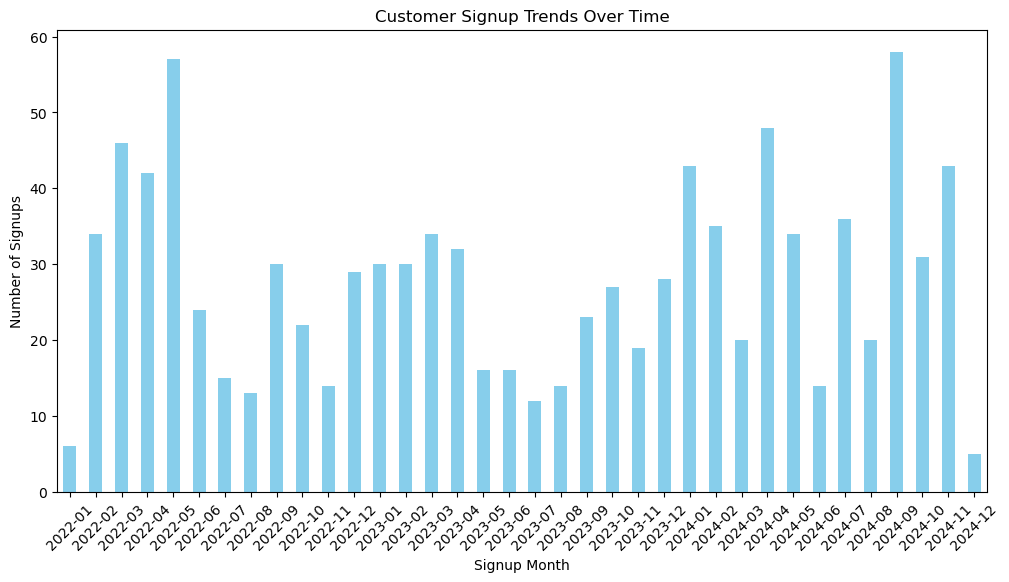

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Region', data=df, hue='Region', palette='cool', order=customer_region_count.index, legend=False)
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)
plt.show()

# Signup trends
df['SignupMonth'] = df['SignupDate'].dt.to_period('M')
signup_trends = df['SignupMonth'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
signup_trends.plot(kind='bar', color='skyblue')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Signup Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()



--- Top Selling Products ---
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


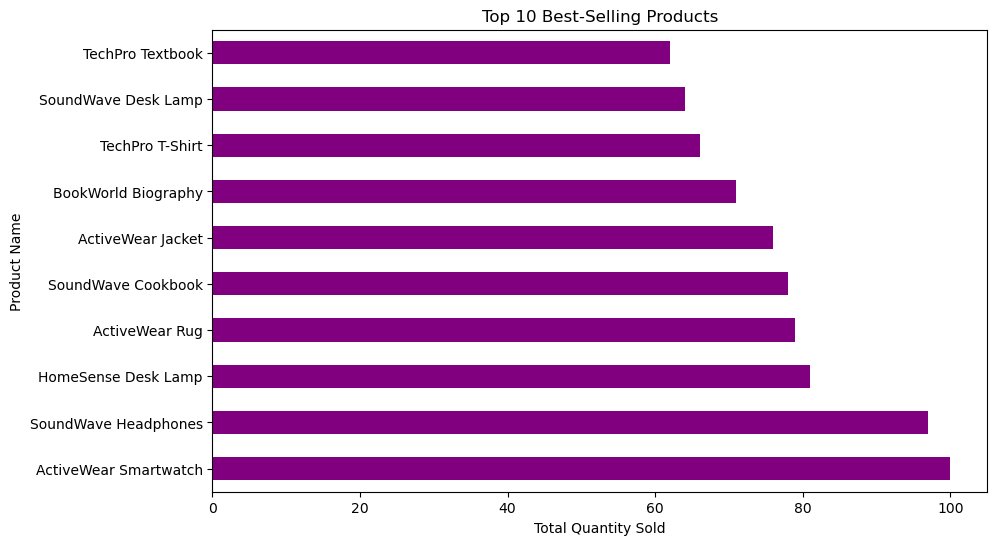

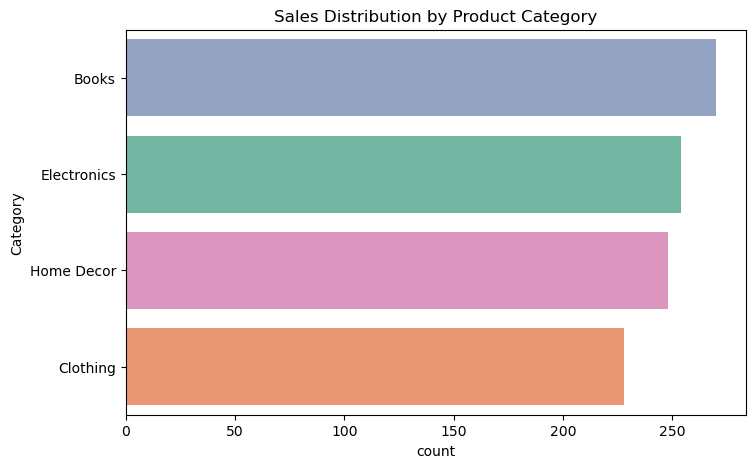

In [33]:
print("\n--- Top Selling Products ---")
top_products = df.groupby('ProductName')['Quantity'].sum().nlargest(10)
print(top_products)

plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='purple')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.show()

# Category-wise product distribution
plt.figure(figsize=(8, 5))
sns.countplot(y='Category', data=df,hue='Category', palette='Set2', order=df['Category'].value_counts().index)
plt.title('Sales Distribution by Product Category')
plt.show()


In [32]:
print("\n--- Top Selling Products ---")
top_products = df.groupby('ProductName')['Quantity'].sum()
print(top_products)


--- Top Selling Products ---
ProductName
ActiveWear Biography       18
ActiveWear Cookbook        22
ActiveWear Cookware Set    51
ActiveWear Headphones      36
ActiveWear Jacket          76
                           ..
TechPro Running Shoes      28
TechPro Smartwatch         32
TechPro T-Shirt            66
TechPro Textbook           62
TechPro Vase               45
Name: Quantity, Length: 66, dtype: int64


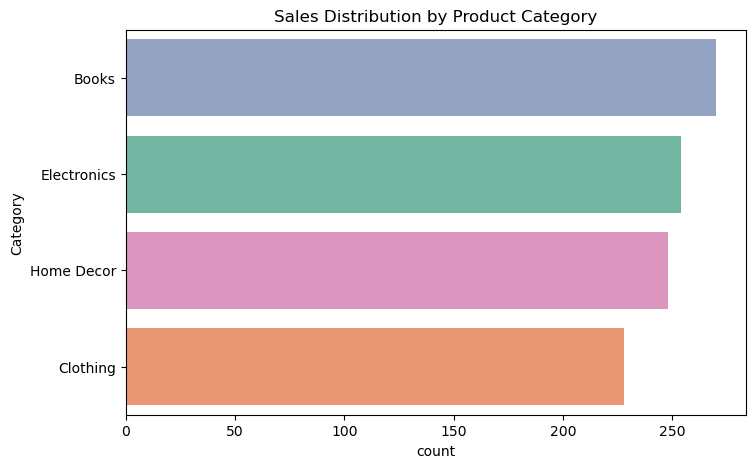

In [40]:
# Category-wise product distribution
plt.figure(figsize=(8, 5))
sns.countplot(y='Category',hue='Category',data=df, palette='Set2', order=df['Category'].value_counts().index)
plt.title('Sales Distribution by Product Category')
plt.show()

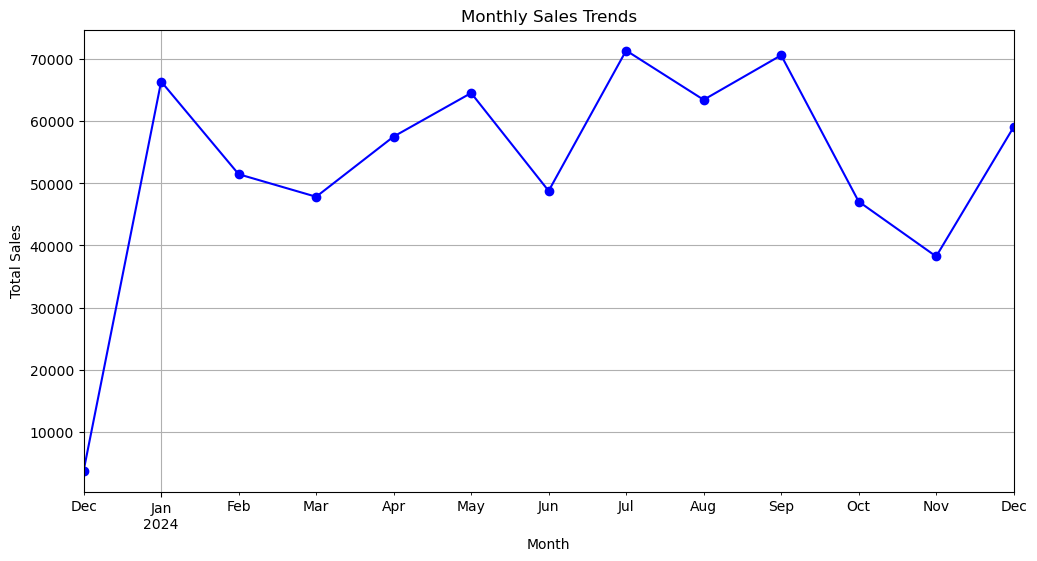

In [41]:
df['TransactionMonth'] = df['TransactionDate'].dt.to_period('M')
monthly_sales = df.groupby('TransactionMonth')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


--- Revenue by Region ---
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


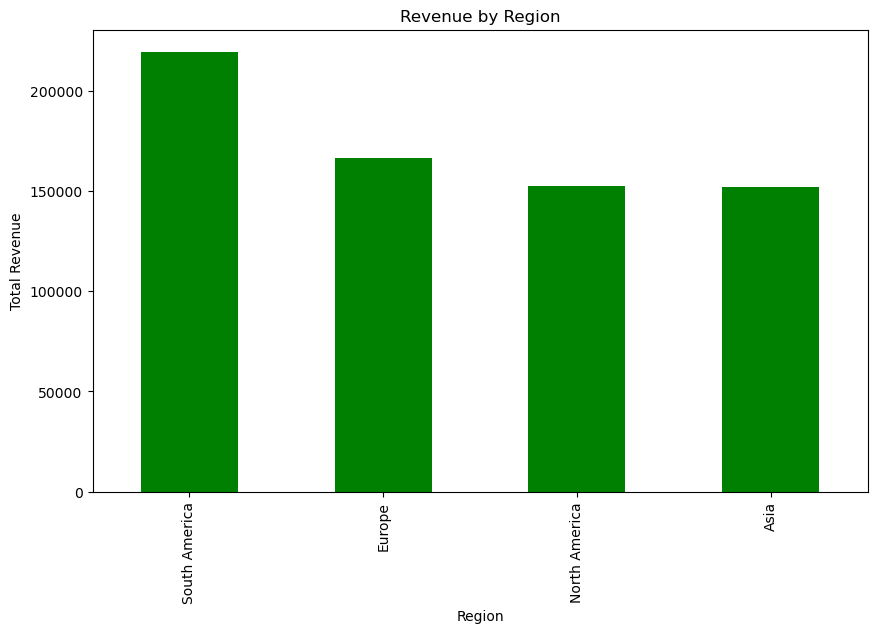

In [42]:
# --- 5. Regional Sales Analysis ---
print("\n--- Revenue by Region ---")
region_sales = df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(region_sales)

plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='green')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()



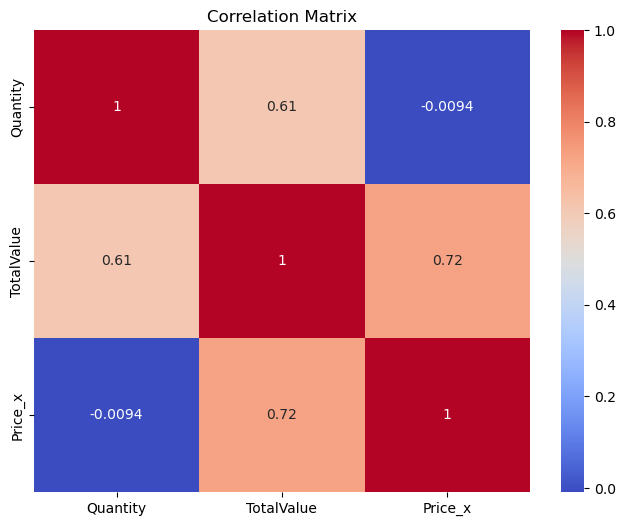

In [43]:
# --- 6. Correlation Analysis ---
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Quantity', 'TotalValue', 'Price_x']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



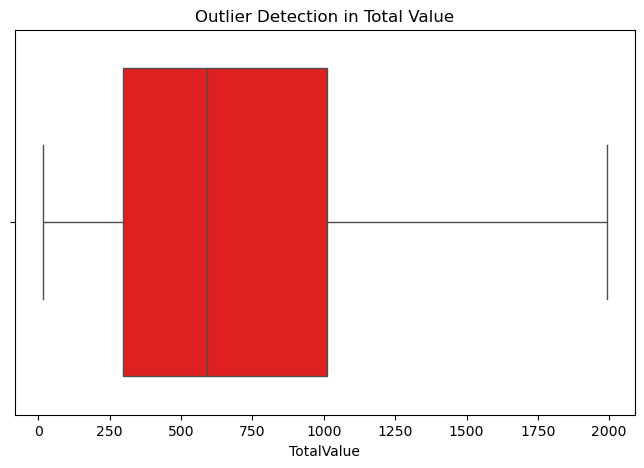

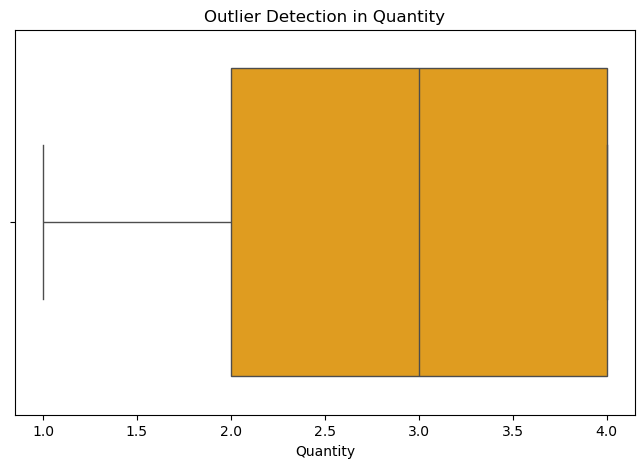

In [44]:
# --- 7. Insights & Outlier Detection ---
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TotalValue'], color='red')
plt.title('Outlier Detection in Total Value')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Quantity'], color='orange')
plt.title('Outlier Detection in Quantity')
plt.show()


Total Revenue: 689995.56
Average Order Value (AOV): 689.9955600000001


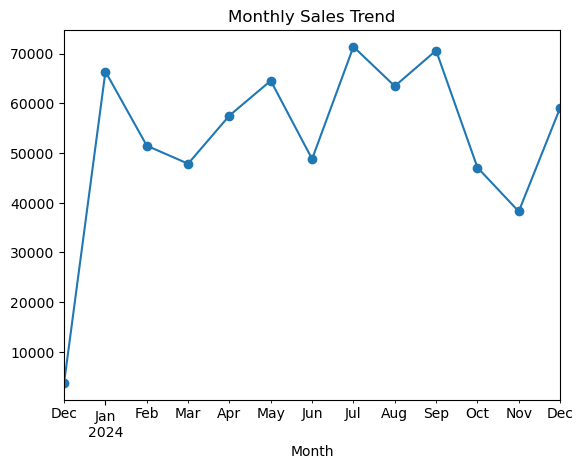

Top 5 Customers by Spending:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


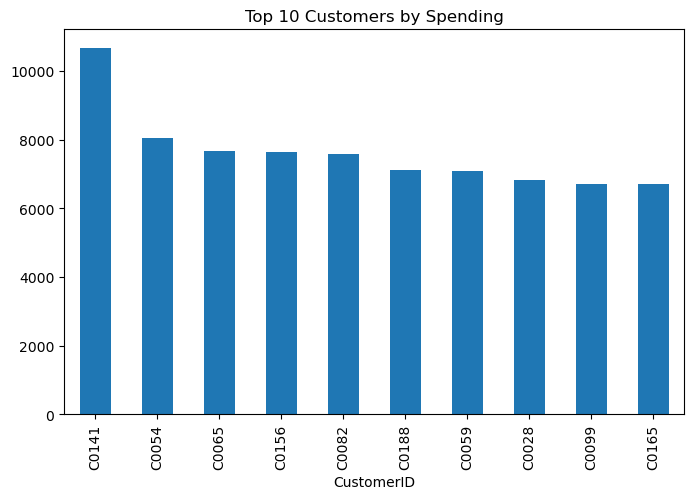

Top 5 Selling Products:
 ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
Name: Quantity, dtype: int64


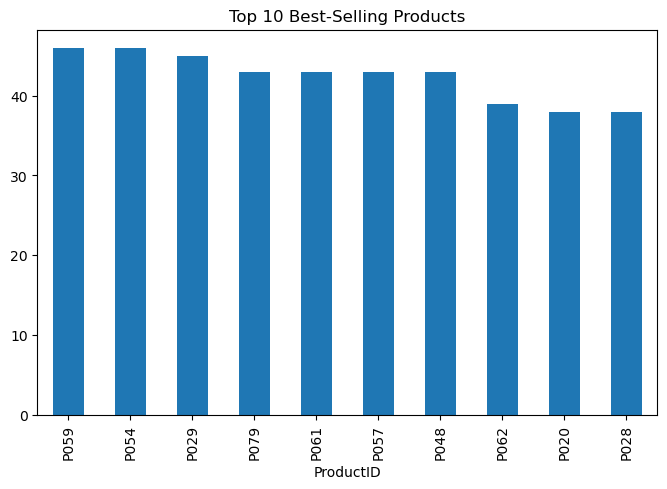

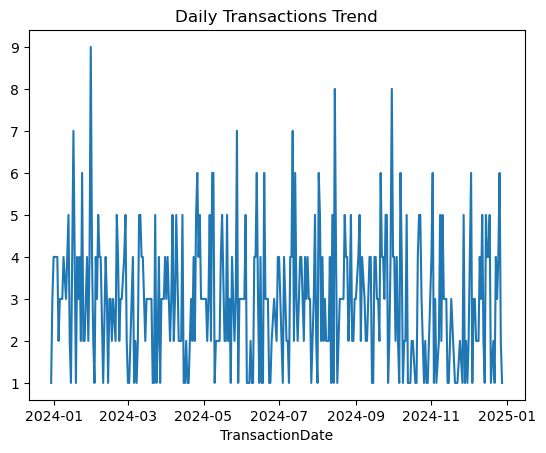

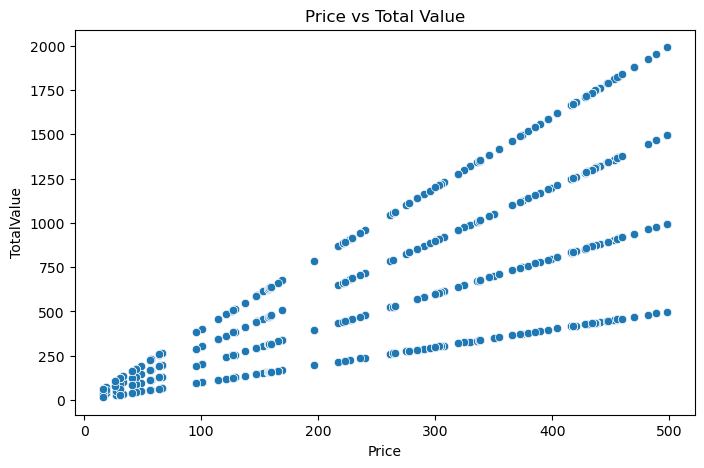

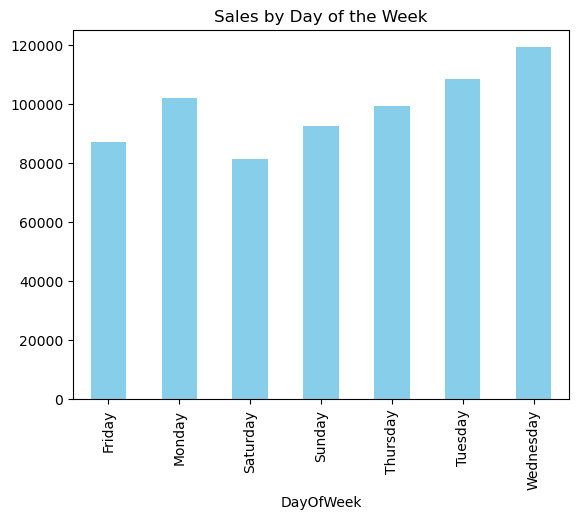

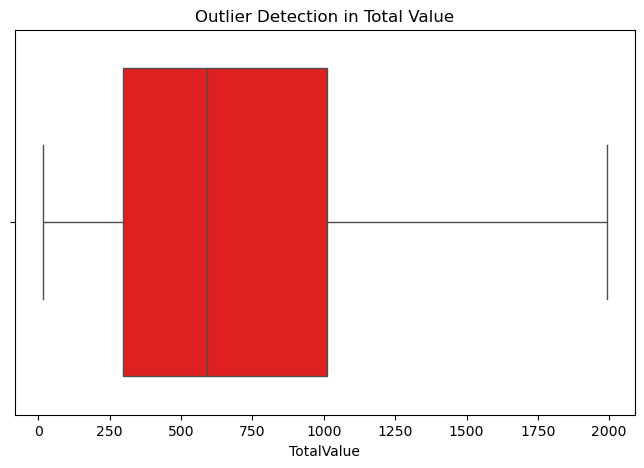

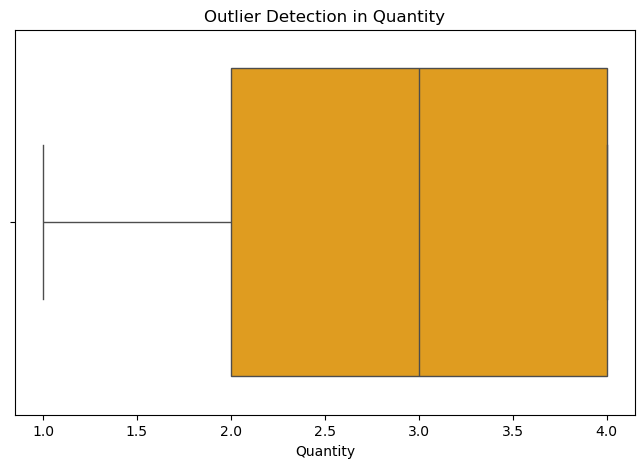

Top Product Categories by Revenue:
    ProductID              ProductName     Category   Price
0       P001     ActiveWear Biography        Books  169.30
1       P002    ActiveWear Smartwatch  Electronics  346.30
2       P003  ComfortLiving Biography        Books   44.12
3       P004            BookWorld Rug   Home Decor   95.69
4       P005          TechPro T-Shirt     Clothing  429.31
..       ...                      ...          ...     ...
95      P096     SoundWave Headphones  Electronics  307.47
96      P097       BookWorld Cookbook        Books  319.34
97      P098         SoundWave Laptop  Electronics  299.93
98      P099   SoundWave Mystery Book        Books  354.29
99      P100        HomeSense Sweater     Clothing  126.34

[100 rows x 4 columns]


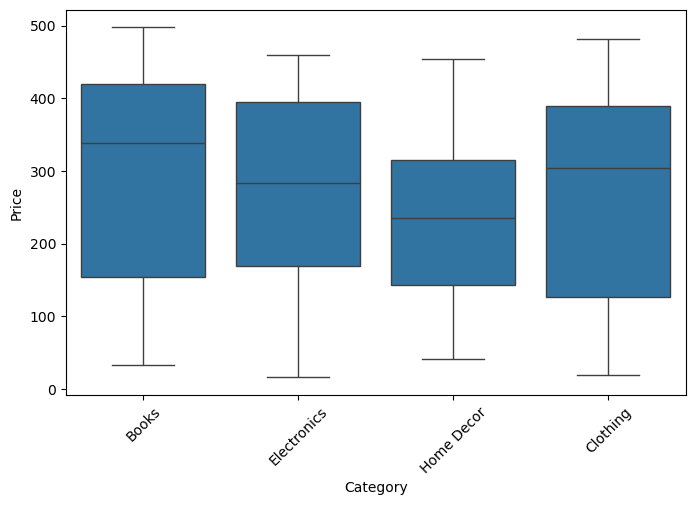

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('Downloads/assesment/Transactions.csv')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

print("Total Revenue:", df['TotalValue'].sum())
print("Average Order Value (AOV):", df['TotalValue'].mean())

df['Month'] = df['TransactionDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.show()

customer_spending = df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print("Top 5 Customers by Spending:\n", customer_spending.head())

plt.figure(figsize=(8, 5))
customer_spending.head(10).plot(kind='bar', title='Top 10 Customers by Spending')
plt.show()

top_products = df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
print("Top 5 Selling Products:\n", top_products.head())

plt.figure(figsize=(8, 5))
top_products.head(10).plot(kind='bar', title='Top 10 Best-Selling Products')
plt.show()

daily_transactions = df.groupby(df['TransactionDate'].dt.date)['TransactionID'].count()
daily_transactions.plot(kind='line', title='Daily Transactions Trend')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Price', y='TotalValue', data=df)
plt.title('Price vs Total Value')
plt.show()

df['DayOfWeek'] = df['TransactionDate'].dt.day_name()
daywise_sales = df.groupby('DayOfWeek')['TotalValue'].sum()

daywise_sales.plot(kind='bar', title='Sales by Day of the Week', color='skyblue')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TotalValue'], color='red')
plt.title('Outlier Detection in Total Value')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Quantity'], color='orange')
plt.title('Outlier Detection in Quantity')
plt.show()

products_df = pd.read_csv('Downloads/assesment/Products.csv')
print("Top Product Categories by Revenue:\n", products_df)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Category', y='Price', data=products_df)
plt.xticks(rotation=45)
plt.show()

In [70]:
# Aggregate transaction data to get customer profiles
customer_profiles = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'
}).reset_index()

customer_profiles.columns = ['CustomerID', 'TotalSpent', 'TotalQuantity', 'TransactionCount']

# Merge with customer data
customer_profiles = pd.merge(customer_profiles, customers, on='CustomerID')

In [71]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
customer_features = scaler.fit_transform(customer_profiles[['TotalSpent', 'TotalQuantity', 'TransactionCount']])

# Calculate cosine similarity
similarity_matrix = cosine_similarity(customer_features)

In [73]:
# Function to get top 3 similar customers
def get_top_similar_customers(customer_id, n=3):
    customer_index = customer_profiles[customer_profiles['CustomerID'] == customer_id].index[0]
    similarity_scores = list(enumerate(similarity_matrix[customer_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_similar_customers = [customer_profiles.iloc[i[0]]['CustomerID'] for i in similarity_scores[1:n+1]]
    top_scores = [i[1] for i in similarity_scores[1:n+1]]
    return list(zip(top_similar_customers, top_scores))

# Generate recommendations for the first 20 customers
lookalike_recommendations = {}
for customer_id in customers['CustomerID'][:20]:
    lookalike_recommendations[customer_id] = get_top_similar_customers(customer_id)

# Save recommendations to CSV
import csv

with open('Lookalike.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['CustomerID', 'Lookalikes'])
    for customer_id, lookalikes in lookalike_recommendations.items():
        writer.writerow([customer_id, lookalikes])